In [1]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

In [2]:
# 층의 정보
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [6]:
conv = model.layers[0]
print(conv.weights[0].shape) # 가중치 
print(conv.weights[1].shape) # 절편

(3, 3, 1, 32)
(32,)


In [7]:
# 가중치의 평균, 표준편차
conv_weights = conv.weights[0].numpy()
print("평균:", conv_weights.mean(), conv_weights.std())

평균: -0.017272748 0.22382684


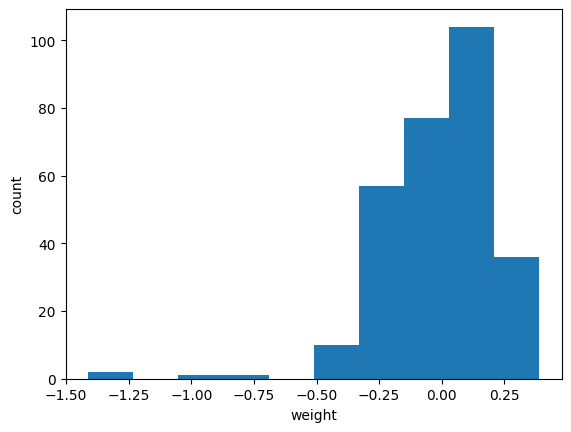

In [8]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel('count')
plt.show()

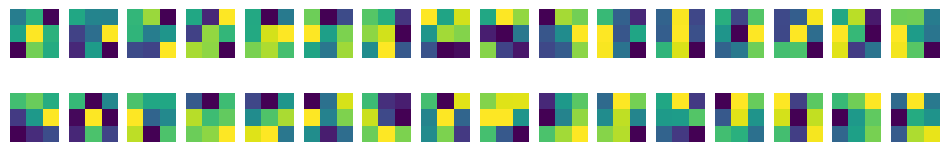

In [10]:
# 가중치 시각화
_, axs = plt.subplots(2, 16, figsize=(12, 2))
for i in range(2): # 0, 1
    for j in range(16):
        cols = i * 16 + j
        axs[i, j].imshow(conv_weights[:,:,0, cols])
        axs[i, j].axis('off')
plt.show()

In [11]:
# 학습하지 않은 빈 모델
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28, 28, 1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))


In [13]:
no_training_conv = no_training_model.layers[0]

no_training_weights = no_training_conv.weights[0].numpy()
print("평균:", no_training_weights.mean(), "표준편차:", no_training_weights.std())

평균: -0.00054758106 표준편차: 0.07913207


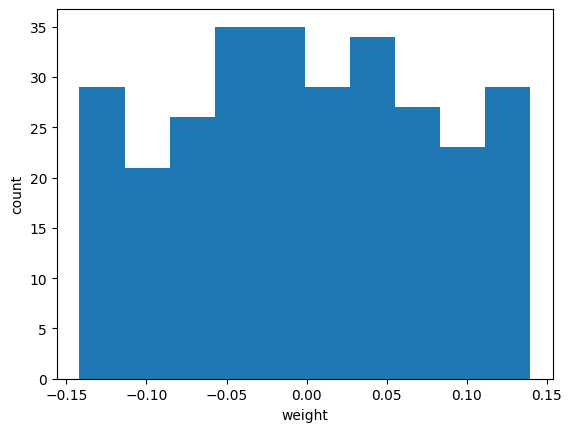

In [14]:
import matplotlib.pyplot as plt

plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel('count')
plt.show()